# VGGNetwork
a vgg network for CIFA10 classfier test

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
from keras.datasets import cifar10
# Load cifar10 raw data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Training data shape:', x_train.shape)
print('Training label shape', y_train.shape)
print('Test data shape', x_test.shape)
print('Test label shape', y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training label shape (50000, 1)
Test data shape (10000, 32, 32, 3)
Test label shape (10000, 1)


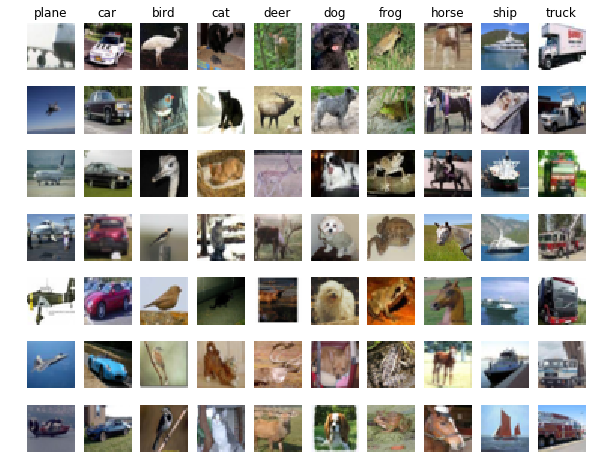

In [99]:
# Visualisze some examples from datasets
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
sample_per_class = 7

plt.figure()
for y, cls in enumerate(classes):
    cls_indices = np.flatnonzero(y_train == y)
    samples_indices = np.random.choice(cls_indices, sample_per_class, replace=False)
    samples = x_train[samples_indices]
    for x, sample in enumerate(samples):
        # subplot index count from 1
        plt_idx = x * num_classes + y + 1
        plt.subplot(sample_per_class, num_classes, plt_idx)
        plt.imshow(sample)
        plt.axis('off')
        if x == 0:
            plt.title(cls)
plt.show()    

[130 136 132 130 135 131 131 136 132 131]


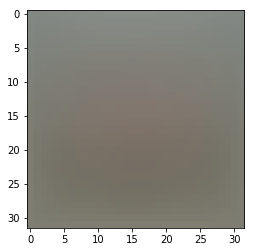

In [100]:

# preprocess image data
x_train = np.reshape(x_train, (x_train.shape[0], -1))
y_train = keras.utils.to_categorical(y_train, num_classes)

x_test = np.reshape(x_test, (x_test.shape[0], -1))
y_test = keras.utils.to_categorical(y_test, num_classes)

x_mean = np.mean(x_train, axis=0).astype('uint8')
print(x_mean[:10])
plt.figure(figsize=(4, 4))
plt.imshow(x_mean.reshape((32, 32, 3)))
plt.show()
# x_train -= x_mean
# x_test -= x_mean

# Subsample data for more efficient code execution
num_training = 5000

mask = list(range(num_training))
x_small_train = x_train[mask]
y_small_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
x_small_test = x_train[mask]
y_small_test = y_test[mask]


# SVM
test a simple full connected svm classifier

In [174]:
# training 

svm_model = Sequential()
svm_model.add(Dense(num_classes, 
                    input_shape=(3072,),
                    kernel_regularizer=keras.regularizers.l2(9e3),
                    kernel_initializer=keras.initializers.random_normal(stddev=1e-3),
                    use_bias=True,
                    ))

svm_model.compile(optimizer=keras.optimizers.SGD(lr=1.6e-7),
                  loss=keras.losses.categorical_hinge,
                  metrics=['accuracy'],
                  )
svm_model.summary()

# TODO: svm loss not num_classes-1 when weight is set small
# loss, acc = svm_model.train_on_batch(x_small_train, y_small_train)
# print(loss, acc)
# class LossHistory(keras.callbacks.Callback):
# 
# 
#     def on_epoch_begin(self, batch, logs={}):
#         lr = K.get_value(self.model.optimizer.lr)
#         print('Ir:', lr)
# 

history = svm_model.fit(x_train, y_train,
                        epochs=8, batch_size=200,
                        validation_split=0.02, shuffle=True,
                        )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Train on 49000 samples, validate on 1000 samples
Epoch 1/8


  200/49000 [..............................] - ETA: 6:11 - loss: 285.7124 - acc: 0.0800

 2400/49000 [>.............................] - ETA: 30s - loss: 272.1128 - acc: 0.1004 

 4800/49000 [=>............................] - ETA: 14s - loss: 262.4376 - acc: 0.1081

 7000/49000 [===>..........................] - ETA: 10s - loss: 254.2960 - acc: 0.1101

 9400/49000 [====>.........................] - ETA: 7s - loss: 245.8514 - acc: 0.1145 

11800/49000 [======>.......................] - ETA: 5s - loss: 237.8069 - acc: 0.1164

14400/49000 [=======>......................] - ETA: 4s - loss: 229.5336 - acc: 0.1190

17000/49000 [=========>....................] - ETA: 3s - loss: 221.6691 - acc: 0.1196

19400/49000 [==========>...................] - ETA: 2s - loss: 214.7324 - acc: 0.1240

21800/49000 [============>.................] - ETA: 2s - loss: 208.1085 - acc: 0.1263

24200/49000 [=============>................] - ETA: 2s - loss: 201.7745 - acc: 0.1295

26600/49000 [===============>..............] - ETA: 1s - loss: 195.7160 - acc: 0.1318

28800/49000 [================>.............] - ETA: 1s - loss: 190.3844 - acc: 0.1348

31000/49000 [=================>............] - ETA: 1s - loss: 185.2668 - acc: 0.1374

33200/49000 [===================>..........] - ETA: 1s - loss: 180.3488 - acc: 0.1395

35000/49000 [====================>.........] - ETA: 0s - loss: 176.4672 - acc: 0.1406

37200/49000 [=====================>........] - ETA: 0s - loss: 171.8820 - acc: 0.1428

39400/49000 [=======================>......] - ETA: 0s - loss: 167.4735 - acc: 0.1443

41600/49000 [========================>.....] - ETA: 0s - loss: 163.2306 - acc: 0.1467

43800/49000 [=========================>....] - ETA: 0s - loss: 159.1491 - acc: 0.1481

46000/49000 [===========================>..] - ETA: 0s - loss: 155.2154 - acc: 0.1507

48200/49000 [============================>.] - ETA: 0s - loss: 151.4251 - acc: 0.1535

49000/49000 [==============================] - 3s 59us/step - loss: 150.0813 - acc: 0.1545 - val_loss: 68.2369 - val_acc: 0.1940


Epoch 2/8
  200/49000 [..............................] - ETA: 2s - loss: 68.1682 - acc: 0.2250

 2400/49000 [>.............................] - ETA: 1s - loss: 66.1393 - acc: 0.2075

 4400/49000 [=>............................] - ETA: 1s - loss: 64.3149 - acc: 0.2009

 6400/49000 [==>...........................] - ETA: 1s - loss: 62.5441 - acc: 0.2028

 8600/49000 [====>.........................] - ETA: 1s - loss: 60.6846 - acc: 0.2044

10800/49000 [=====>........................] - ETA: 0s - loss: 58.9076 - acc: 0.2042

12800/49000 [======>.......................] - ETA: 0s - loss: 57.3537 - acc: 0.2046

15000/49000 [========>.....................] - ETA: 0s - loss: 55.7060 - acc: 0.2052

17200/49000 [=========>....................] - ETA: 0s - loss: 54.1187 - acc: 0.2074

19400/49000 [==========>...................] - ETA: 0s - loss: 52.6002 - acc: 0.2081

21600/49000 [============>.................] - ETA: 0s - loss: 51.1509 - acc: 0.2083

23800/49000 [=============>................] - ETA: 0s - loss: 49.7554 - acc: 0.2100

26200/49000 [===============>..............] - ETA: 0s - loss: 48.2933 - acc: 0.2106

28400/49000 [================>.............] - ETA: 0s - loss: 47.0027 - acc: 0.2125

30600/49000 [=================>............] - ETA: 0s - loss: 45.7639 - acc: 0.2128

33000/49000 [===================>..........] - ETA: 0s - loss: 44.4699 - acc: 0.2140

35200/49000 [====================>.........] - ETA: 0s - loss: 43.3292 - acc: 0.2151

37400/49000 [=====================>........] - ETA: 0s - loss: 42.2339 - acc: 0.2166

39600/49000 [=======================>......] - ETA: 0s - loss: 41.1805 - acc: 0.2171

41800/49000 [========================>.....] - ETA: 0s - loss: 40.1653 - acc: 0.2174

44200/49000 [==========================>...] - ETA: 0s - loss: 39.1120 - acc: 0.2176

46600/49000 [===========================>..] - ETA: 0s - loss: 38.0955 - acc: 0.2180

49000/49000 [==============================] - 1s 24us/step - loss: 37.1184 - acc: 0.2186 - val_loss: 17.6320 - val_acc: 0.2400


Epoch 3/8
  200/49000 [..............................] - ETA: 1s - loss: 17.5379 - acc: 0.3100

 2600/49000 [>.............................] - ETA: 1s - loss: 16.9768 - acc: 0.2392

 4800/49000 [=>............................] - ETA: 1s - loss: 16.4903 - acc: 0.2367

 7400/49000 [===>..........................] - ETA: 0s - loss: 15.9980 - acc: 0.2292

10000/49000 [=====>........................] - ETA: 0s - loss: 15.4852 - acc: 0.2313

12200/49000 [======>.......................] - ETA: 0s - loss: 15.0651 - acc: 0.2302

14400/49000 [=======>......................] - ETA: 0s - loss: 14.6817 - acc: 0.2299

17000/49000 [=========>....................] - ETA: 0s - loss: 14.2487 - acc: 0.2294

19400/49000 [==========>...................] - ETA: 0s - loss: 13.8680 - acc: 0.2295

21600/49000 [============>.................] - ETA: 0s - loss: 13.5317 - acc: 0.2290

23800/49000 [=============>................] - ETA: 0s - loss: 13.2192 - acc: 0.2282

26400/49000 [===============>..............] - ETA: 0s - loss: 12.8507 - acc: 0.2271

29000/49000 [================>.............] - ETA: 0s - loss: 12.5001 - acc: 0.2278

31600/49000 [==================>...........] - ETA: 0s - loss: 12.1488 - acc: 0.2283

34200/49000 [===================>..........] - ETA: 0s - loss: 11.8239 - acc: 0.2284

36600/49000 [=====================>........] - ETA: 0s - loss: 11.5446 - acc: 0.2295

39200/49000 [=======================>......] - ETA: 0s - loss: 11.2492 - acc: 0.2289

41800/49000 [========================>.....] - ETA: 0s - loss: 10.9717 - acc: 0.2277

44200/49000 [==========================>...] - ETA: 0s - loss: 10.7249 - acc: 0.2274

46600/49000 [===========================>..] - ETA: 0s - loss: 10.4900 - acc: 0.2263

48800/49000 [============================>.] - ETA: 0s - loss: 10.2809 - acc: 0.2264

49000/49000 [==============================] - 1s 22us/step - loss: 10.2631 - acc: 0.2264 - val_loss: 6.2846 - val_acc: 0.1640


Epoch 4/8
  200/49000 [..............................] - ETA: 1s - loss: 6.1944 - acc: 0.1650

 2400/49000 [>.............................] - ETA: 1s - loss: 5.7464 - acc: 0.2108

 4600/49000 [=>............................] - ETA: 1s - loss: 5.5243 - acc: 0.2193

 7000/49000 [===>..........................] - ETA: 0s - loss: 5.3829 - acc: 0.2226

 9200/49000 [====>.........................] - ETA: 0s - loss: 5.3000 - acc: 0.2179

11400/49000 [=====>........................] - ETA: 0s - loss: 5.1859 - acc: 0.2179

13600/49000 [=======>......................] - ETA: 0s - loss: 5.1077 - acc: 0.2170

16000/49000 [========>.....................] - ETA: 0s - loss: 5.0249 - acc: 0.2159

18200/49000 [==========>...................] - ETA: 0s - loss: 4.9485 - acc: 0.2163

20400/49000 [===========>..................] - ETA: 0s - loss: 4.8517 - acc: 0.2184

22800/49000 [============>.................] - ETA: 0s - loss: 4.7695 - acc: 0.2178

25200/49000 [==============>...............] - ETA: 0s - loss: 4.6984 - acc: 0.2184

27600/49000 [===============>..............] - ETA: 0s - loss: 4.5960 - acc: 0.2216

30000/49000 [=================>............] - ETA: 0s - loss: 4.5119 - acc: 0.2224

32600/49000 [==================>...........] - ETA: 0s - loss: 4.4250 - acc: 0.2238

35000/49000 [====================>.........] - ETA: 0s - loss: 4.3546 - acc: 0.2238

37200/49000 [=====================>........] - ETA: 0s - loss: 4.2988 - acc: 0.2232

39400/49000 [=======================>......] - ETA: 0s - loss: 4.2308 - acc: 0.2242

41800/49000 [========================>.....] - ETA: 0s - loss: 4.1718 - acc: 0.2240

44000/49000 [=========================>....] - ETA: 0s - loss: 4.1253 - acc: 0.2236

46400/49000 [===========================>..] - ETA: 0s - loss: 4.0640 - acc: 0.2238

48800/49000 [============================>.] - ETA: 0s - loss: 4.0107 - acc: 0.2241

49000/49000 [==============================] - 1s 23us/step - loss: 4.0070 - acc: 0.2241 - val_loss: 3.1007 - val_acc: 0.2330


Epoch 5/8
  200/49000 [..............................] - ETA: 1s - loss: 3.0749 - acc: 0.1650

 2600/49000 [>.............................] - ETA: 1s - loss: 2.8480 - acc: 0.2135

 5000/49000 [==>...........................] - ETA: 1s - loss: 2.8541 - acc: 0.2130

 7200/49000 [===>..........................] - ETA: 0s - loss: 2.8591 - acc: 0.2114

 9400/49000 [====>.........................] - ETA: 0s - loss: 2.8419 - acc: 0.2118

11600/49000 [======>.......................] - ETA: 0s - loss: 2.8050 - acc: 0.2147

14000/49000 [=======>......................] - ETA: 0s - loss: 2.7610 - acc: 0.2201

16200/49000 [========>.....................] - ETA: 0s - loss: 2.7448 - acc: 0.2199

18000/49000 [==========>...................] - ETA: 0s - loss: 2.7171 - acc: 0.2201

20000/49000 [===========>..................] - ETA: 0s - loss: 2.7071 - acc: 0.2199

22200/49000 [============>.................] - ETA: 0s - loss: 2.6912 - acc: 0.2206

24400/49000 [=============>................] - ETA: 0s - loss: 2.6896 - acc: 0.2186

26600/49000 [===============>..............] - ETA: 0s - loss: 2.6795 - acc: 0.2177

28800/49000 [================>.............] - ETA: 0s - loss: 2.6636 - acc: 0.2179

31000/49000 [=================>............] - ETA: 0s - loss: 2.6438 - acc: 0.2186

33200/49000 [===================>..........] - ETA: 0s - loss: 2.6260 - acc: 0.2191

35400/49000 [====================>.........] - ETA: 0s - loss: 2.6044 - acc: 0.2184

37600/49000 [======================>.......] - ETA: 0s - loss: 2.5901 - acc: 0.2179

39800/49000 [=======================>......] - ETA: 0s - loss: 2.5674 - acc: 0.2176

42000/49000 [========================>.....] - ETA: 0s - loss: 2.5523 - acc: 0.2175

44400/49000 [==========================>...] - ETA: 0s - loss: 2.5367 - acc: 0.2184

46800/49000 [===========================>..] - ETA: 0s - loss: 2.5138 - acc: 0.2204

49000/49000 [==============================] - 1s 24us/step - loss: 2.5041 - acc: 0.2202 - val_loss: 2.2491 - val_acc: 0.1960


Epoch 6/8
  200/49000 [..............................] - ETA: 1s - loss: 2.1942 - acc: 0.2150

 2600/49000 [>.............................] - ETA: 1s - loss: 2.0554 - acc: 0.2454

 5000/49000 [==>...........................] - ETA: 0s - loss: 2.1785 - acc: 0.2310

 7400/49000 [===>..........................] - ETA: 0s - loss: 2.1880 - acc: 0.2234

 9600/49000 [====>.........................] - ETA: 0s - loss: 2.2218 - acc: 0.2236

12000/49000 [======>.......................] - ETA: 0s - loss: 2.1744 - acc: 0.2254

14400/49000 [=======>......................] - ETA: 0s - loss: 2.1624 - acc: 0.2277

16800/49000 [=========>....................] - ETA: 0s - loss: 2.1299 - acc: 0.2296

19000/49000 [==========>...................] - ETA: 0s - loss: 2.1218 - acc: 0.2284

21400/49000 [============>.................] - ETA: 0s - loss: 2.1093 - acc: 0.2298

23600/49000 [=============>................] - ETA: 0s - loss: 2.1020 - acc: 0.2297

26200/49000 [===============>..............] - ETA: 0s - loss: 2.1154 - acc: 0.2299

28600/49000 [================>.............] - ETA: 0s - loss: 2.1204 - acc: 0.2283

30800/49000 [=================>............] - ETA: 0s - loss: 2.1104 - acc: 0.2279

33200/49000 [===================>..........] - ETA: 0s - loss: 2.1098 - acc: 0.2266

35400/49000 [====================>.........] - ETA: 0s - loss: 2.1210 - acc: 0.2252

37800/49000 [======================>.......] - ETA: 0s - loss: 2.1269 - acc: 0.2239

40200/49000 [=======================>......] - ETA: 0s - loss: 2.1439 - acc: 0.2222

42600/49000 [=========================>....] - ETA: 0s - loss: 2.1608 - acc: 0.2202

45000/49000 [==========================>...] - ETA: 0s - loss: 2.1540 - acc: 0.2212

47200/49000 [===========================>..] - ETA: 0s - loss: 2.1513 - acc: 0.2208

49000/49000 [==============================] - 1s 23us/step - loss: 2.1499 - acc: 0.2207 - val_loss: 1.9470 - val_acc: 0.2770


Epoch 7/8
  200/49000 [..............................] - ETA: 1s - loss: 1.8987 - acc: 0.2550

 2400/49000 [>.............................] - ETA: 1s - loss: 2.2547 - acc: 0.2104

 4800/49000 [=>............................] - ETA: 1s - loss: 2.1417 - acc: 0.2162

 7200/49000 [===>..........................] - ETA: 0s - loss: 2.1407 - acc: 0.2189

 9600/49000 [====>.........................] - ETA: 0s - loss: 2.1034 - acc: 0.2223

11800/49000 [======>.......................] - ETA: 0s - loss: 2.0702 - acc: 0.2245

14200/49000 [=======>......................] - ETA: 0s - loss: 2.0328 - acc: 0.2257

16400/49000 [=========>....................] - ETA: 0s - loss: 2.0399 - acc: 0.2245

18600/49000 [==========>...................] - ETA: 0s - loss: 2.0682 - acc: 0.2228

20800/49000 [===========>..................] - ETA: 0s - loss: 2.1121 - acc: 0.2182

23200/49000 [=============>................] - ETA: 0s - loss: 2.0874 - acc: 0.2203

25400/49000 [==============>...............] - ETA: 0s - loss: 2.0843 - acc: 0.2188

27600/49000 [===============>..............] - ETA: 0s - loss: 2.0717 - acc: 0.2188

29800/49000 [=================>............] - ETA: 0s - loss: 2.0627 - acc: 0.2210

32000/49000 [==================>...........] - ETA: 0s - loss: 2.0587 - acc: 0.2196

34200/49000 [===================>..........] - ETA: 0s - loss: 2.0696 - acc: 0.2204

36600/49000 [=====================>........] - ETA: 0s - loss: 2.0650 - acc: 0.2222

39000/49000 [======================>.......] - ETA: 0s - loss: 2.0732 - acc: 0.2208

41200/49000 [========================>.....] - ETA: 0s - loss: 2.0672 - acc: 0.2215

43400/49000 [=========================>....] - ETA: 0s - loss: 2.0563 - acc: 0.2223

45600/49000 [==========================>...] - ETA: 0s - loss: 2.0543 - acc: 0.2216

48000/49000 [============================>.] - ETA: 0s - loss: 2.0568 - acc: 0.2214

49000/49000 [==============================] - 1s 23us/step - loss: 2.0618 - acc: 0.2207 - val_loss: 2.4289 - val_acc: 0.1660


Epoch 8/8
  200/49000 [..............................] - ETA: 1s - loss: 2.3677 - acc: 0.1900

 2600/49000 [>.............................] - ETA: 1s - loss: 2.2451 - acc: 0.2092

 5000/49000 [==>...........................] - ETA: 0s - loss: 2.1735 - acc: 0.2092

 7600/49000 [===>..........................] - ETA: 0s - loss: 2.1061 - acc: 0.2129

10000/49000 [=====>........................] - ETA: 0s - loss: 2.1551 - acc: 0.2117

12400/49000 [======>.......................] - ETA: 0s - loss: 2.1345 - acc: 0.2115

14800/49000 [========>.....................] - ETA: 0s - loss: 2.1221 - acc: 0.2102

17200/49000 [=========>....................] - ETA: 0s - loss: 2.1003 - acc: 0.2122

19600/49000 [===========>..................] - ETA: 0s - loss: 2.0903 - acc: 0.2153

22000/49000 [============>.................] - ETA: 0s - loss: 2.1069 - acc: 0.2128

24200/49000 [=============>................] - ETA: 0s - loss: 2.0894 - acc: 0.2158

26400/49000 [===============>..............] - ETA: 0s - loss: 2.0778 - acc: 0.2154

28800/49000 [================>.............] - ETA: 0s - loss: 2.0723 - acc: 0.2166

31000/49000 [=================>............] - ETA: 0s - loss: 2.0689 - acc: 0.2169

33200/49000 [===================>..........] - ETA: 0s - loss: 2.0586 - acc: 0.2178

35600/49000 [====================>.........] - ETA: 0s - loss: 2.0502 - acc: 0.2187

38000/49000 [======================>.......] - ETA: 0s - loss: 2.0490 - acc: 0.2189

40400/49000 [=======================>......] - ETA: 0s - loss: 2.0487 - acc: 0.2193

42600/49000 [=========================>....] - ETA: 0s - loss: 2.0489 - acc: 0.2192

44800/49000 [==========================>...] - ETA: 0s - loss: 2.0426 - acc: 0.2204

47200/49000 [===========================>..] - ETA: 0s - loss: 2.0522 - acc: 0.2201

49000/49000 [==============================] - 1s 23us/step - loss: 2.0538 - acc: 0.2200 - val_loss: 1.7700 - val_acc: 0.2900


dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])


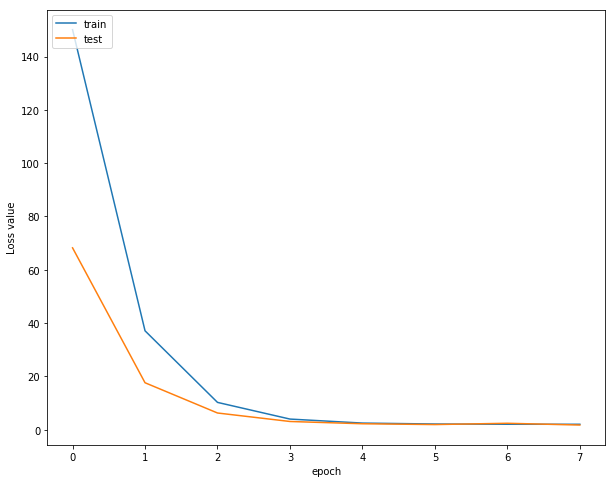

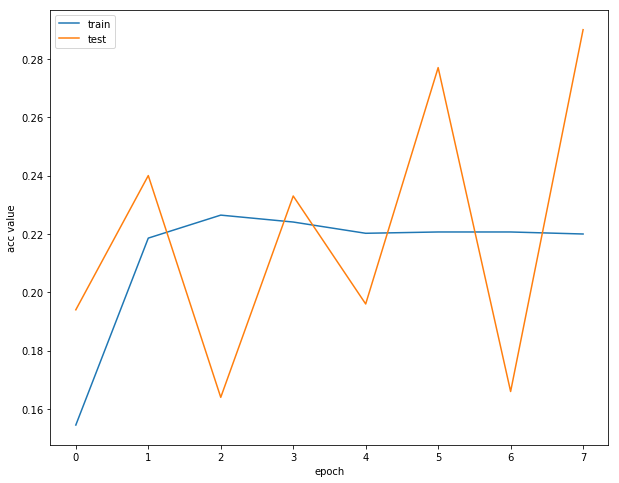

In [175]:

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Softmax test
here we use softmax classifier for cifar10

In [177]:
# training 

softmax_model = Sequential()
softmax_model.add(Dense(10, 
                        input_shape=(3072,),
                        kernel_regularizer=keras.regularizers.l2(2.5e4),
                        kernel_initializer=keras.initializers.random_normal(stddev=1e-3),
                        ))
softmax_model.add(Activation('softmax'))

opt = koptimizer=keras.optimizers.SGD(lr=1e-7)
softmax_model.compile(optimizer=opt,
                      loss=keras.losses.categorical_crossentropy,
                      metrics=['accuracy'],
                      )
svm_model.summary()
history = softmax_model.fit(x_train, y_train,
                            epochs=8, batch_size=200,
                            validation_split=0.02, shuffle=True,
                            )
# Test loss is euqal log(C)
# loss, acc = softmax_model.train_on_batch(x_small_train, y_small_train)
# print(loss, acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Train on 49000 samples, validate on 1000 samples
Epoch 1/8


  200/49000 [..............................] - ETA: 6:27 - loss: 773.9003 - acc: 0.0450

 2400/49000 [>.............................] - ETA: 31s - loss: 730.7075 - acc: 0.0812 

 4600/49000 [=>............................] - ETA: 16s - loss: 691.5167 - acc: 0.0950

 6800/49000 [===>..........................] - ETA: 10s - loss: 655.7527 - acc: 0.1010

 9000/49000 [====>.........................] - ETA: 7s - loss: 622.6149 - acc: 0.1058 

11200/49000 [=====>........................] - ETA: 6s - loss: 591.8339 - acc: 0.1093

13400/49000 [=======>......................] - ETA: 5s - loss: 563.2071 - acc: 0.1115

15600/49000 [========>.....................] - ETA: 4s - loss: 536.5075 - acc: 0.1135

17800/49000 [=========>....................] - ETA: 3s - loss: 511.5881 - acc: 0.1156

20000/49000 [===========>..................] - ETA: 2s - loss: 488.3174 - acc: 0.1179

22200/49000 [============>.................] - ETA: 2s - loss: 466.5734 - acc: 0.1197

24400/49000 [=============>................] - ETA: 2s - loss: 446.2348 - acc: 0.1216

26600/49000 [===============>..............] - ETA: 1s - loss: 427.1888 - acc: 0.1233

28800/49000 [================>.............] - ETA: 1s - loss: 409.3367 - acc: 0.1272

31000/49000 [=================>............] - ETA: 1s - loss: 392.5975 - acc: 0.1309

33200/49000 [===================>..........] - ETA: 1s - loss: 376.8886 - acc: 0.1334

35200/49000 [====================>.........] - ETA: 0s - loss: 363.4392 - acc: 0.1362

37200/49000 [=====================>........] - ETA: 0s - loss: 350.7251 - acc: 0.1384

39200/49000 [=======================>......] - ETA: 0s - loss: 338.6993 - acc: 0.1408

41200/49000 [========================>.....] - ETA: 0s - loss: 327.3149 - acc: 0.1430

43400/49000 [=========================>....] - ETA: 0s - loss: 315.4874 - acc: 0.1455

45400/49000 [==========================>...] - ETA: 0s - loss: 305.3243 - acc: 0.1475

47600/49000 [============================>.] - ETA: 0s - loss: 294.7489 - acc: 0.1496

49000/49000 [==============================] - 3s 61us/step - loss: 288.3295 - acc: 0.1508 - val_loss: 67.3477 - val_acc: 0.2090


Epoch 2/8
  200/49000 [..............................] - ETA: 1s - loss: 67.3524 - acc: 0.2200

 2600/49000 [>.............................] - ETA: 1s - loss: 63.5801 - acc: 0.2154

 5000/49000 [==>...........................] - ETA: 0s - loss: 60.1022 - acc: 0.2120

 7200/49000 [===>..........................] - ETA: 0s - loss: 57.1300 - acc: 0.2147

 9400/49000 [====>.........................] - ETA: 0s - loss: 54.3721 - acc: 0.2169

11600/49000 [======>.......................] - ETA: 0s - loss: 51.7965 - acc: 0.2201

13800/49000 [=======>......................] - ETA: 0s - loss: 49.4008 - acc: 0.2213

16000/49000 [========>.....................] - ETA: 0s - loss: 47.1637 - acc: 0.2238

18200/49000 [==========>...................] - ETA: 0s - loss: 45.0770 - acc: 0.2251

20400/49000 [===========>..................] - ETA: 0s - loss: 43.1242 - acc: 0.2287

22600/49000 [============>.................] - ETA: 0s - loss: 41.3008 - acc: 0.2290

24800/49000 [==============>...............] - ETA: 0s - loss: 39.5921 - acc: 0.2318

26800/49000 [===============>..............] - ETA: 0s - loss: 38.1346 - acc: 0.2336

29200/49000 [================>.............] - ETA: 0s - loss: 36.4936 - acc: 0.2363

31400/49000 [==================>...........] - ETA: 0s - loss: 35.0889 - acc: 0.2380

33600/49000 [===================>..........] - ETA: 0s - loss: 33.7688 - acc: 0.2393

35800/49000 [====================>.........] - ETA: 0s - loss: 32.5279 - acc: 0.2418

38000/49000 [======================>.......] - ETA: 0s - loss: 31.3617 - acc: 0.2436

40200/49000 [=======================>......] - ETA: 0s - loss: 30.2638 - acc: 0.2466

42600/49000 [=========================>....] - ETA: 0s - loss: 29.1397 - acc: 0.2490

45000/49000 [==========================>...] - ETA: 0s - loss: 28.0858 - acc: 0.2508

47600/49000 [============================>.] - ETA: 0s - loss: 27.0173 - acc: 0.2528

49000/49000 [==============================] - 1s 23us/step - loss: 26.4705 - acc: 0.2544 - val_loss: 7.6707 - val_acc: 0.2930


Epoch 3/8
  200/49000 [..............................] - ETA: 1s - loss: 7.6162 - acc: 0.3800

 2400/49000 [>.............................] - ETA: 1s - loss: 7.3555 - acc: 0.3100

 4600/49000 [=>............................] - ETA: 1s - loss: 7.0935 - acc: 0.2974

 6800/49000 [===>..........................] - ETA: 1s - loss: 6.8437 - acc: 0.2957

 8600/49000 [====>.........................] - ETA: 1s - loss: 6.6489 - acc: 0.2952

10600/49000 [=====>........................] - ETA: 0s - loss: 6.4437 - acc: 0.2957

12600/49000 [======>.......................] - ETA: 0s - loss: 6.2516 - acc: 0.2956

14600/49000 [=======>......................] - ETA: 0s - loss: 6.0718 - acc: 0.2966

16600/49000 [=========>....................] - ETA: 0s - loss: 5.9039 - acc: 0.2967

18600/49000 [==========>...................] - ETA: 0s - loss: 5.7456 - acc: 0.2970

20800/49000 [===========>..................] - ETA: 0s - loss: 5.5805 - acc: 0.2984

23200/49000 [=============>................] - ETA: 0s - loss: 5.4131 - acc: 0.2992

25600/49000 [==============>...............] - ETA: 0s - loss: 5.2576 - acc: 0.2993

28000/49000 [================>.............] - ETA: 0s - loss: 5.1129 - acc: 0.2993

30200/49000 [=================>............] - ETA: 0s - loss: 4.9892 - acc: 0.2996

32600/49000 [==================>...........] - ETA: 0s - loss: 4.8614 - acc: 0.3004

35000/49000 [====================>.........] - ETA: 0s - loss: 4.7426 - acc: 0.3007

37200/49000 [=====================>........] - ETA: 0s - loss: 4.6402 - acc: 0.3009

39400/49000 [=======================>......] - ETA: 0s - loss: 4.5448 - acc: 0.3009

41800/49000 [========================>.....] - ETA: 0s - loss: 4.4469 - acc: 0.3006

44200/49000 [==========================>...] - ETA: 0s - loss: 4.3557 - acc: 0.3012

46800/49000 [===========================>..] - ETA: 0s - loss: 4.2619 - acc: 0.3026

49000/49000 [==============================] - 1s 24us/step - loss: 4.1888 - acc: 0.3024 - val_loss: 2.6007 - val_acc: 0.2810


Epoch 4/8
  200/49000 [..............................] - ETA: 1s - loss: 2.5845 - acc: 0.3100

 3000/49000 [>.............................] - ETA: 0s - loss: 2.5558 - acc: 0.2973

 5600/49000 [==>...........................] - ETA: 0s - loss: 2.5243 - acc: 0.3057

 8200/49000 [====>.........................] - ETA: 0s - loss: 2.5018 - acc: 0.3041

10800/49000 [=====>........................] - ETA: 0s - loss: 2.4789 - acc: 0.3059

13200/49000 [=======>......................] - ETA: 0s - loss: 2.4592 - acc: 0.3086

15400/49000 [========>.....................] - ETA: 0s - loss: 2.4445 - acc: 0.3094

17600/49000 [=========>....................] - ETA: 0s - loss: 2.4309 - acc: 0.3078

19600/49000 [===========>..................] - ETA: 0s - loss: 2.4175 - acc: 0.3104

21800/49000 [============>.................] - ETA: 0s - loss: 2.4036 - acc: 0.3093

24000/49000 [=============>................] - ETA: 0s - loss: 2.3892 - acc: 0.3104

26200/49000 [===============>..............] - ETA: 0s - loss: 2.3781 - acc: 0.3105

28200/49000 [================>.............] - ETA: 0s - loss: 2.3672 - acc: 0.3117

30400/49000 [=================>............] - ETA: 0s - loss: 2.3570 - acc: 0.3111

32600/49000 [==================>...........] - ETA: 0s - loss: 2.3465 - acc: 0.3113

35000/49000 [====================>.........] - ETA: 0s - loss: 2.3348 - acc: 0.3121

37200/49000 [=====================>........] - ETA: 0s - loss: 2.3263 - acc: 0.3108

39400/49000 [=======================>......] - ETA: 0s - loss: 2.3177 - acc: 0.3104

41600/49000 [========================>.....] - ETA: 0s - loss: 2.3110 - acc: 0.3105

43800/49000 [=========================>....] - ETA: 0s - loss: 2.3037 - acc: 0.3111

46000/49000 [===========================>..] - ETA: 0s - loss: 2.2972 - acc: 0.3107

48000/49000 [============================>.] - ETA: 0s - loss: 2.2915 - acc: 0.3109

49000/49000 [==============================] - 1s 23us/step - loss: 2.2889 - acc: 0.3105 - val_loss: 2.1564 - val_acc: 0.3160


Epoch 5/8
  200/49000 [..............................] - ETA: 1s - loss: 2.1304 - acc: 0.3250

 2400/49000 [>.............................] - ETA: 1s - loss: 2.1550 - acc: 0.3217

 4600/49000 [=>............................] - ETA: 1s - loss: 2.1488 - acc: 0.3107

 7000/49000 [===>..........................] - ETA: 0s - loss: 2.1471 - acc: 0.3080

 9400/49000 [====>.........................] - ETA: 0s - loss: 2.1443 - acc: 0.3097

11800/49000 [======>.......................] - ETA: 0s - loss: 2.1412 - acc: 0.3124

14200/49000 [=======>......................] - ETA: 0s - loss: 2.1412 - acc: 0.3110

16600/49000 [=========>....................] - ETA: 0s - loss: 2.1384 - acc: 0.3123

19000/49000 [==========>...................] - ETA: 0s - loss: 2.1360 - acc: 0.3129

21200/49000 [===========>..................] - ETA: 0s - loss: 2.1356 - acc: 0.3127

23400/49000 [=============>................] - ETA: 0s - loss: 2.1347 - acc: 0.3134

25600/49000 [==============>...............] - ETA: 0s - loss: 2.1336 - acc: 0.3130

27800/49000 [================>.............] - ETA: 0s - loss: 2.1334 - acc: 0.3132

30200/49000 [=================>............] - ETA: 0s - loss: 2.1328 - acc: 0.3135

32400/49000 [==================>...........] - ETA: 0s - loss: 2.1321 - acc: 0.3138

35000/49000 [====================>.........] - ETA: 0s - loss: 2.1307 - acc: 0.3145

37400/49000 [=====================>........] - ETA: 0s - loss: 2.1295 - acc: 0.3148

39800/49000 [=======================>......] - ETA: 0s - loss: 2.1285 - acc: 0.3145

42200/49000 [========================>.....] - ETA: 0s - loss: 2.1286 - acc: 0.3137

44600/49000 [==========================>...] - ETA: 0s - loss: 2.1282 - acc: 0.3144

46800/49000 [===========================>..] - ETA: 0s - loss: 2.1278 - acc: 0.3140

49000/49000 [==============================] - 1s 23us/step - loss: 2.1263 - acc: 0.3150 - val_loss: 2.1373 - val_acc: 0.2820


Epoch 6/8
  200/49000 [..............................] - ETA: 1s - loss: 2.1483 - acc: 0.2950

 2400/49000 [>.............................] - ETA: 1s - loss: 2.1223 - acc: 0.3150

 4600/49000 [=>............................] - ETA: 1s - loss: 2.1209 - acc: 0.3100

 6800/49000 [===>..........................] - ETA: 1s - loss: 2.1179 - acc: 0.3141

 9200/49000 [====>.........................] - ETA: 0s - loss: 2.1149 - acc: 0.3168

11600/49000 [======>.......................] - ETA: 0s - loss: 2.1165 - acc: 0.3156

13800/49000 [=======>......................] - ETA: 0s - loss: 2.1148 - acc: 0.3166

16000/49000 [========>.....................] - ETA: 0s - loss: 2.1155 - acc: 0.3143

18000/49000 [==========>...................] - ETA: 0s - loss: 2.1141 - acc: 0.3154

20000/49000 [===========>..................] - ETA: 0s - loss: 2.1157 - acc: 0.3154

22000/49000 [============>.................] - ETA: 0s - loss: 2.1141 - acc: 0.3167

23800/49000 [=============>................] - ETA: 0s - loss: 2.1147 - acc: 0.3163

26000/49000 [==============>...............] - ETA: 0s - loss: 2.1142 - acc: 0.3164

28000/49000 [================>.............] - ETA: 0s - loss: 2.1143 - acc: 0.3144

30200/49000 [=================>............] - ETA: 0s - loss: 2.1138 - acc: 0.3134

32400/49000 [==================>...........] - ETA: 0s - loss: 2.1130 - acc: 0.3128

34600/49000 [====================>.........] - ETA: 0s - loss: 2.1123 - acc: 0.3139

36800/49000 [=====================>........] - ETA: 0s - loss: 2.1127 - acc: 0.3132

39000/49000 [======================>.......] - ETA: 0s - loss: 2.1127 - acc: 0.3135

41400/49000 [========================>.....] - ETA: 0s - loss: 2.1128 - acc: 0.3134

43800/49000 [=========================>....] - ETA: 0s - loss: 2.1131 - acc: 0.3139

46400/49000 [===========================>..] - ETA: 0s - loss: 2.1131 - acc: 0.3142

48800/49000 [============================>.] - ETA: 0s - loss: 2.1127 - acc: 0.3143

49000/49000 [==============================] - 1s 24us/step - loss: 2.1127 - acc: 0.3143 - val_loss: 2.1158 - val_acc: 0.3300


Epoch 7/8
  200/49000 [..............................] - ETA: 1s - loss: 2.0635 - acc: 0.3500

 2400/49000 [>.............................] - ETA: 1s - loss: 2.0923 - acc: 0.3308

 4600/49000 [=>............................] - ETA: 1s - loss: 2.1046 - acc: 0.3235

 6800/49000 [===>..........................] - ETA: 1s - loss: 2.1088 - acc: 0.3163

 9000/49000 [====>.........................] - ETA: 0s - loss: 2.1115 - acc: 0.3124

11200/49000 [=====>........................] - ETA: 0s - loss: 2.1138 - acc: 0.3099

13400/49000 [=======>......................] - ETA: 0s - loss: 2.1128 - acc: 0.3098

15600/49000 [========>.....................] - ETA: 0s - loss: 2.1102 - acc: 0.3105

17800/49000 [=========>....................] - ETA: 0s - loss: 2.1102 - acc: 0.3104

19800/49000 [===========>..................] - ETA: 0s - loss: 2.1113 - acc: 0.3105

22000/49000 [============>.................] - ETA: 0s - loss: 2.1112 - acc: 0.3114

24200/49000 [=============>................] - ETA: 0s - loss: 2.1115 - acc: 0.3111

26200/49000 [===============>..............] - ETA: 0s - loss: 2.1109 - acc: 0.3113

28400/49000 [================>.............] - ETA: 0s - loss: 2.1107 - acc: 0.3111

30600/49000 [=================>............] - ETA: 0s - loss: 2.1102 - acc: 0.3120

32800/49000 [===================>..........] - ETA: 0s - loss: 2.1109 - acc: 0.3121

35000/49000 [====================>.........] - ETA: 0s - loss: 2.1109 - acc: 0.3128

37200/49000 [=====================>........] - ETA: 0s - loss: 2.1112 - acc: 0.3130

39400/49000 [=======================>......] - ETA: 0s - loss: 2.1111 - acc: 0.3133

41600/49000 [========================>.....] - ETA: 0s - loss: 2.1106 - acc: 0.3127

43800/49000 [=========================>....] - ETA: 0s - loss: 2.1103 - acc: 0.3123

46000/49000 [===========================>..] - ETA: 0s - loss: 2.1104 - acc: 0.3121

48200/49000 [============================>.] - ETA: 0s - loss: 2.1110 - acc: 0.3115

49000/49000 [==============================] - 1s 25us/step - loss: 2.1112 - acc: 0.3115 - val_loss: 2.1191 - val_acc: 0.3270


Epoch 8/8


  200/49000 [..............................] - ETA: 2s - loss: 2.1005 - acc: 0.3100

 2400/49000 [>.............................] - ETA: 1s - loss: 2.1162 - acc: 0.3075

 4600/49000 [=>............................] - ETA: 1s - loss: 2.1119 - acc: 0.3146

 6800/49000 [===>..........................] - ETA: 1s - loss: 2.1124 - acc: 0.3100

 9200/49000 [====>.........................] - ETA: 0s - loss: 2.1115 - acc: 0.3121

11800/49000 [======>.......................] - ETA: 0s - loss: 2.1120 - acc: 0.3124

14400/49000 [=======>......................] - ETA: 0s - loss: 2.1122 - acc: 0.3131

16800/49000 [=========>....................] - ETA: 0s - loss: 2.1123 - acc: 0.3118

19000/49000 [==========>...................] - ETA: 0s - loss: 2.1112 - acc: 0.3099

21200/49000 [===========>..................] - ETA: 0s - loss: 2.1122 - acc: 0.3096

23400/49000 [=============>................] - ETA: 0s - loss: 2.1114 - acc: 0.3105

25600/49000 [==============>...............] - ETA: 0s - loss: 2.1108 - acc: 0.3105

27800/49000 [================>.............] - ETA: 0s - loss: 2.1114 - acc: 0.3109

30000/49000 [=================>............] - ETA: 0s - loss: 2.1124 - acc: 0.3107

32200/49000 [==================>...........] - ETA: 0s - loss: 2.1115 - acc: 0.3113

34800/49000 [====================>.........] - ETA: 0s - loss: 2.1111 - acc: 0.3116

37400/49000 [=====================>........] - ETA: 0s - loss: 2.1116 - acc: 0.3116

40000/49000 [=======================>......] - ETA: 0s - loss: 2.1116 - acc: 0.3113

42400/49000 [========================>.....] - ETA: 0s - loss: 2.1112 - acc: 0.3116

44600/49000 [==========================>...] - ETA: 0s - loss: 2.1109 - acc: 0.3116

46800/49000 [===========================>..] - ETA: 0s - loss: 2.1109 - acc: 0.3112

49000/49000 [==============================] - 1s 23us/step - loss: 2.1117 - acc: 0.3104 - val_loss: 2.1213 - val_acc: 0.3330


dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])


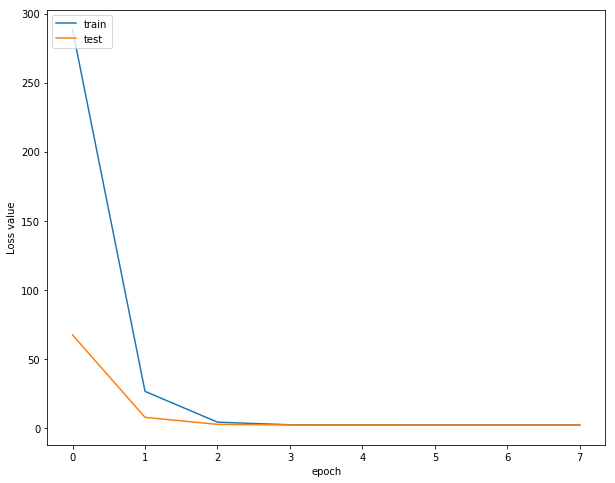

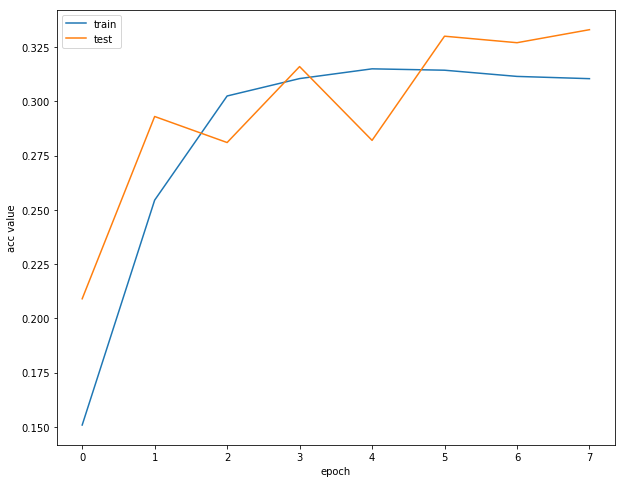

In [178]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()